<a href="https://colab.research.google.com/github/yonghwadragon/ANN-Function-Approximation/blob/main/prompt%2CLMM_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial Neural Network (ANN) 11월19일
---




Byung Chun Kim 박사님께 배운 내용 (wizardbc@gmail.com)

### **인공 신경망 (ANN)**

![ANN](https://upload.wikimedia.org/wikipedia/commons/3/3d/Neural_network.svg)  

[출처: Wikimedia](https://commons.wikimedia.org/wiki/File:Neural_network.svg)  

- 각 원은 실수를 나타냄.  
- 입력 뉴런(초록색 원)은 벡터 $ (x_1, x_2)^T \in \mathbb{R}^2 $ 를 나타냄.  
- 입력 뉴런에서 은닉층 뉴런(파란색 원)으로 가는 연결선은 가중치 $ \left(a_{ij}^{(1)}\right) $ 및 편향 $ \left(b_{ij}^{(1)}\right) $ 를 가지며, 이는 $ \mathbb{R}^{5\times2} $ 차원을 가짐.  
- 은닉층 뉴런(파란색 원)은 다음 벡터를 표현함:  
  $$
  \left(\sigma(y_1), \sigma(y_2), \dots, \sigma(y_5)\right)^T \in \mathbb{R}^5
  $$
  여기서  
  $$
  y_i = \sum_{j=1}^{2} \left( a_{ij}^{(1)} x_j + b_{ij}^{(1)} \right)
  $$  
  그리고 $ \sigma: \mathbb{R} \to \mathbb{R} $ 는 활성화 함수임.  

- 은닉층 뉴런에서 출력 뉴런(노란색 원)으로 가는 연결선은 가중치 $ \left(a_{ij}^{(2)}\right) $ 및 편향 $ \left(b_{ij}^{(2)}\right) $ 를 가지며, 이는 $ \mathbb{R}^{1\times5} $ 차원을 가짐.  
- 출력 뉴런은 다음 실수를 나타냄:  
  $$
  \sum_{j=1}^{5} \left(a_{ij}^{(2)} \sigma(y_i) + b_{ij}^{(2)}\right)
  $$  


## 아핀 변환 (Affine Maps)

벡터

$$
x=(x_1,\ldots, x_d)^T\in\mathbb{R}^d
$$

가 주어졌을 때, 아핀 변환 $ W $ 는 다음과 같은 요소로 구성됨:

- 선형 변환(행렬) $ A=\left(a_{ij}\right)\in\mathbb{R}^{n\times d} $ (가중치)
- 벡터 $ b=(b_1,\ldots,b_n)^T\in\mathbb{R}^n $ (편향)

그러면 $ W(x) $ 는 $ n $ 차원의 벡터가 되며, 다음과 같이 표현됨:

$$
W(x) = Ax + b = \left(\sum_{j=1}^d a_{ij}x_j + b_i\right)^T \in \mathbb{R}^n
$$


## 성분별 함수 적용 (Component-wise Composition)

함수 $ \sigma:\mathbb{R} \rightarrow \mathbb{R} $ 와 벡터

$$
y=\left(y_1,\ldots,y_n\right)^T\in\mathbb{R}^n
$$

가 주어졌을 때, $ \sigma(y) $ 는 각 성분에 대해 함수 $ \sigma $ 를 적용한 벡터를 의미함:

$$
\sigma(y) = \left(\sigma(y_1),\sigma(y_2),\dots,\sigma(y_n)\right)^T \in \mathbb{R}^n.
$$


이제 그림 속 신경망을 다음과 같이 나타낼 수 있음:

$$
W_2\circ\sigma\circ W_1
$$

여기서,

- $ W_1 = \left(A_1, b_1\right) $ 이며,  
  $ A_1=\left(a_{ij}^{(1)}\right)\in\mathbb{R}^{5\times 2} $,  
  $ b_1=\left(\sum_{j=1}^2 b_{ij}^{(1)}\right)^T\in\mathbb{R}^5 $

- $ W_2 = \left(A_2, b_2\right) $ 이며,  
  $ A_2=\left(a_{ij}^{(2)}\right)\in\mathbb{R}^{1\times 5} $,  
  $ b_2=\sum_{j=1}^5 b_{1j}^{(2)}\in\mathbb{R}^1 $


# 보편 근사 정리 (Universal Approximation Theorem)


## 임의의 너비(Arbitrary-width) 경우

[Wikipedia](https://en.wikipedia.org/wiki/Universal_approximation_theorem#Arbitrary-width_case)

(1989, George Cybenko)

연속 함수인 활성화 함수 $ \sigma:\mathbb{R} \rightarrow \mathbb{R} $ 와  
양의 정수 $ d, D $ 가 주어졌을 때,  
함수 $ \sigma $ 가 다항식이 아닐 필요충분조건은 다음과 같음:

임의의 연속 목표 함수 $ f:\mathbb{R}^d\rightarrow\mathbb{R}^D $,  
임의의 콤팩트 부분집합 $ K \subset \mathbb{R}^d $,  
임의의 $ \epsilon > 0 $ 에 대해,  
다음과 같은 형태를 갖는 연속 함수 $ f_\epsilon:\mathbb{R}^d\rightarrow\mathbb{R}^D $ 가 존재함:

$$
f_\epsilon = W_2\circ\sigma\circ W_1
$$

여기서, $ W_1, W_2 $ 는 합성 가능한 아핀 변환(affine maps)이고,  
$ \circ $ 는 성분별 합성을 나타냄.

또한, 이 함수는 다음 근사 경계를 만족함:

$$
\sup_{x\in K} \| f(x) - f_\epsilon(x) \| < \epsilon
$$


### 개요 (Sketch)

연속 함수 $ \sigma:\mathbb{R} \rightarrow \mathbb{R} $ 와  
양의 정수 $ d, D $ 가 주어졌을 때,

$ \sigma $ 가 다항식이 아닐 필요충분조건:

* 모든 연속 함수 $ f:\mathbb{R}^d\rightarrow \mathbb{R}^D $ 에 대해,
* 모든 콤팩트 부분집합 $ K\subset \mathbb{R}^d $ 에 대해,
* 모든 $ \epsilon>0 $ 에 대해,

다음과 같은 신경망 $ \hat{f} $ 가 존재함:

* 입력 뉴런 $ d $ 개,
* 출력 뉴런 $ D $ 개,
* 단 하나의 은닉층을 가지며, 임의 개수의 은닉 뉴런과 활성화 함수 $ \sigma $ 를 포함,

이때, 다음 근사 경계를 만족함:

$$
\sup_{x\in K} \| f(x) - \hat{f}(x) \| < \epsilon
$$


#### 단위 계단 함수 (Heaviside Step Function)

단위 계단 함수 $ H(x) $ 는 다음과 같이 정의됨:

$$
H(x) :=
\begin{cases}
1, & x > 0 \\
0, & x \leq 0
\end{cases}
$$

때때로 다음과 같이 정의되기도 함:

$$
H(x) :=
\begin{cases}
1, & x > 0 \\
\frac{1}{2}, & x = 0 \\
0, & x < 0
\end{cases}
$$


In [ ]:
import numpy as np         #벡터화 약어로 np
import matplotlib.pyplot as plt
#틀린 부분을 직관적으로 보여줍니다.

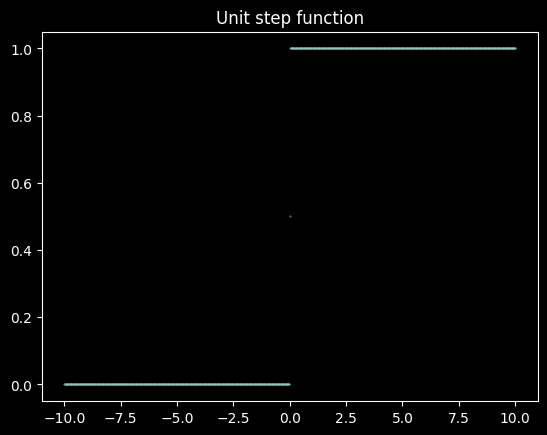

In [ ]:
plt.style.use('dark_background') # 검은색 바탕

#H = np.vectorize(lambda x:1 if x >0.0 else 0.0)
H=np.vectorize(lambda x:1/2 if x==0.0 else 1 if x>0.0 else 0.0) #함수정의

#그래프
domain =np.linspace(-10,10,1001)         #(-10,10)범위에서 1001개의 점을 찍는다
plt.scatter(domain, H(domain), s=.1)       #scatter는 점이 찍히는 것 , (점 사이즈는 1)
plt.title("Unit step function")             #제목
plt.show()                                  # 보여줘

#### 박스카 함수 (Boxcar Function)

박스카 함수는 다음과 같이 정의됨:

$$
\Pi_{a,b}(x):=H(x-a)-H(x-b)
$$

임의의 연속 함수 $ f:\mathbb{R} \rightarrow \mathbb{R} $ 를  
닫힌 구간 $ K=[s,e] $ 에서 박스카 함수를 이용해 근사할 수 있음:

임의의 $ \epsilon > 0 $ 에 대해,  
양의 정수 $ n $ 을 적절히 선택하면,  
다음이 성립함:

$$
x_i := s+\frac{e-s}{n}i \qquad \left(0\leq i \leq n\right)
$$

그리고

$$
f_n:=\sum_{i=1}^{n}f(x_{i})\Pi_{x_{i-1},x_{i}}
$$

이때, 다음 근사 경계를 만족함:

$$
\sup_{x\in K} \| f(x) - f_n(x) \| < \epsilon.
$$

또한, 다음이 성립함:

$$
\begin{align*}
f_n &= \sum_{i=1}^{n}f(x_i)\left(H(x-x_{i-1}) - H(x-x_i)\right)\\
&=f(x_1)H(x-x_{0})-\sum_{i=1}^{n-1}\left(f(x_i)-f(x_{i+1})\right)H(x-x_i)-f(x_n)H(x-x_n),
\end{align*}
$$

따라서, 이를 다음과 같은 신경망 표현으로 나타낼 수 있음:

$$
f_n = W_2\circ H\circ W_1
$$

여기서,

$$
\begin{align*}
W_1 &= \left((1,1,\ldots,1)^T, \left(-x_0,-x_1,\ldots,-x_n\right)^T\right)\in\mathbb{R}^{(n+1)\times 1}\times\mathbb{R}^{n+1},\\
W_2 &= \left(\left(f(x_1), f(x_2)-f(x_1), f(x_3)-f(x_2),\ldots,f(x_n)-f(x_{n-1}), -f(x_n)\right), 0\right)\in\mathbb{R}^{1\times (n+1)}\times\mathbb{R}.
\end{align*}
$$


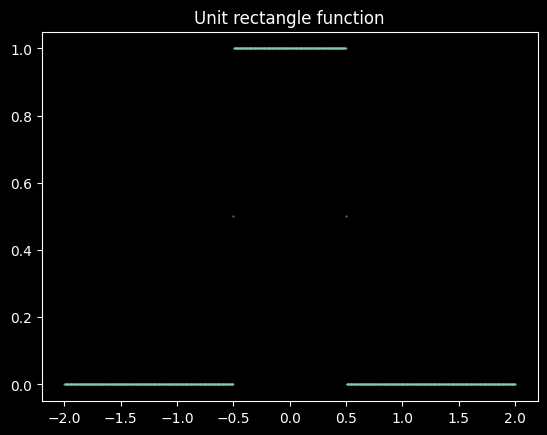

In [ ]:
boxcar = lambda x, a=-.5, b=.5:H(x-a)-H(x-b)

domain = np.linspace(-2,2,1001)                #(-2,2)범위에서 1001개의 점을 찍는다
plt.scatter(domain, boxcar(domain), s=.1)
plt.title("Unit rectangle function")
plt.show()

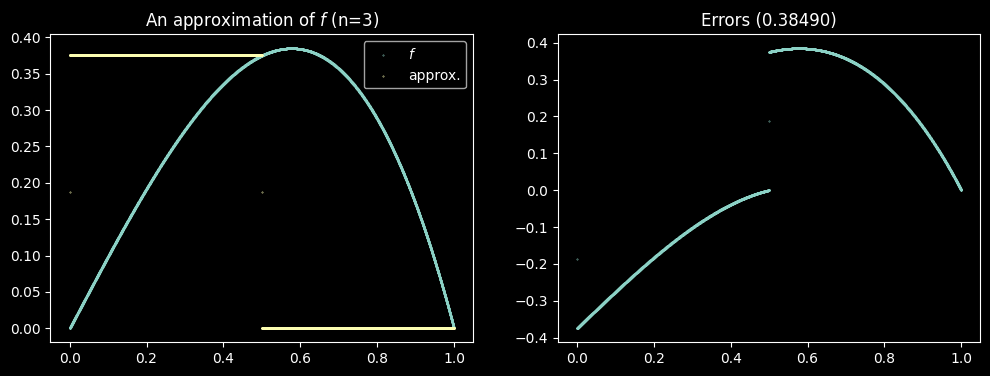

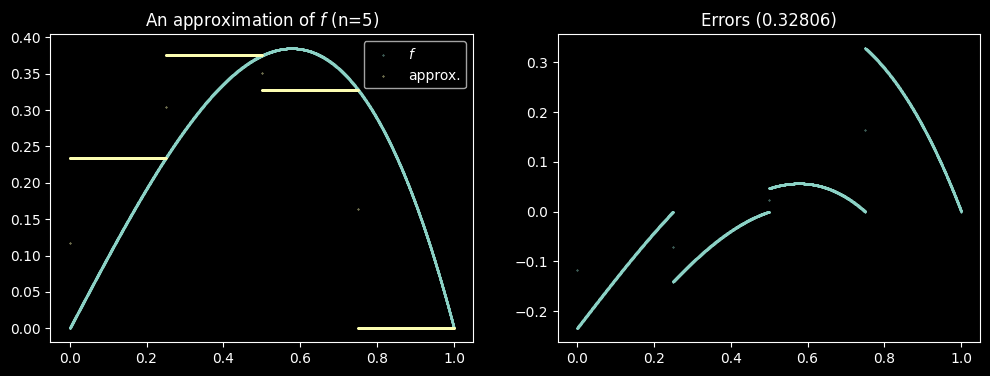

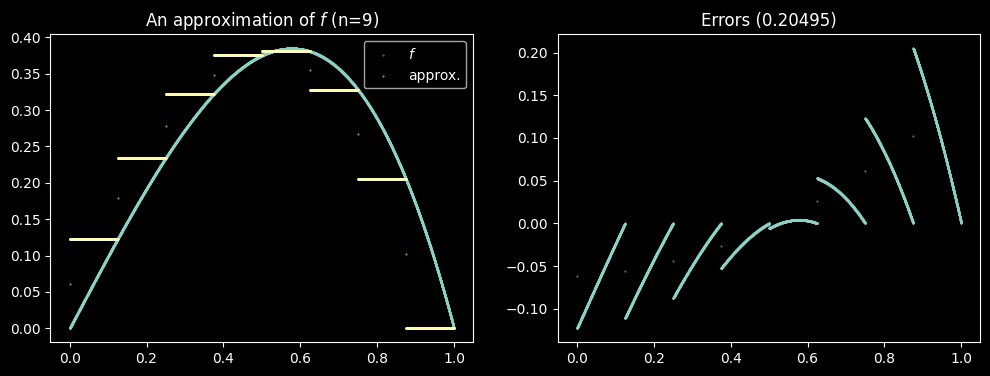

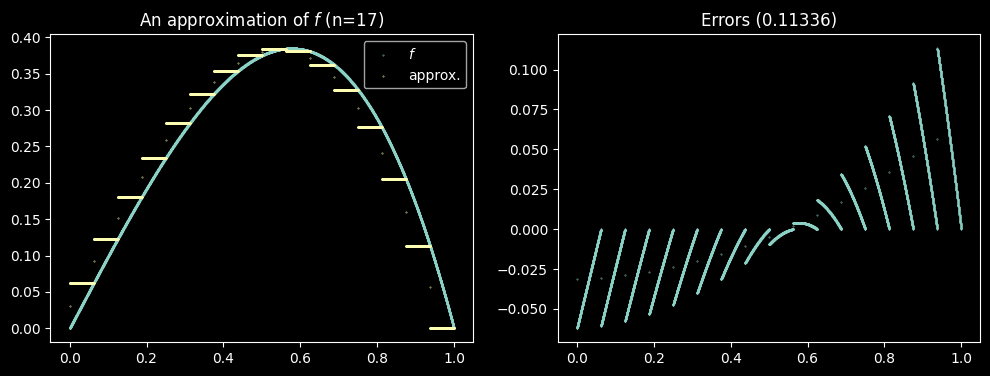

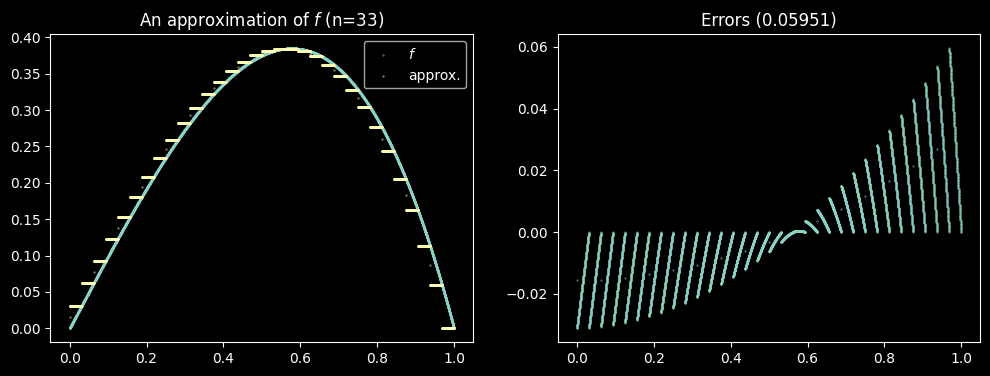

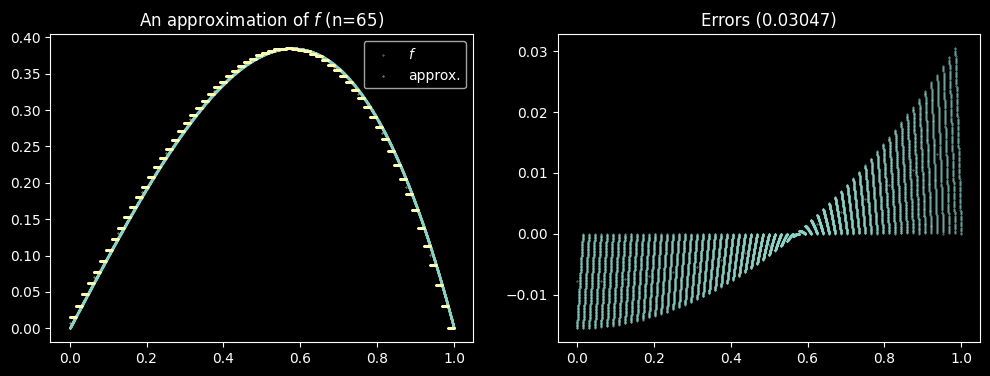

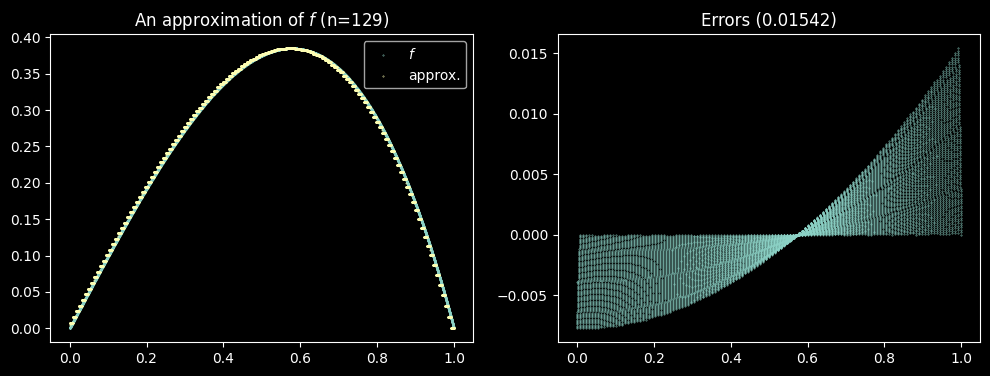

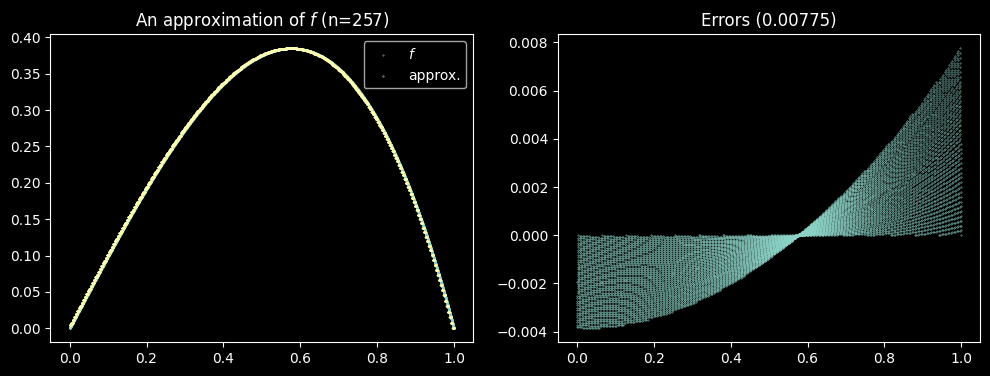

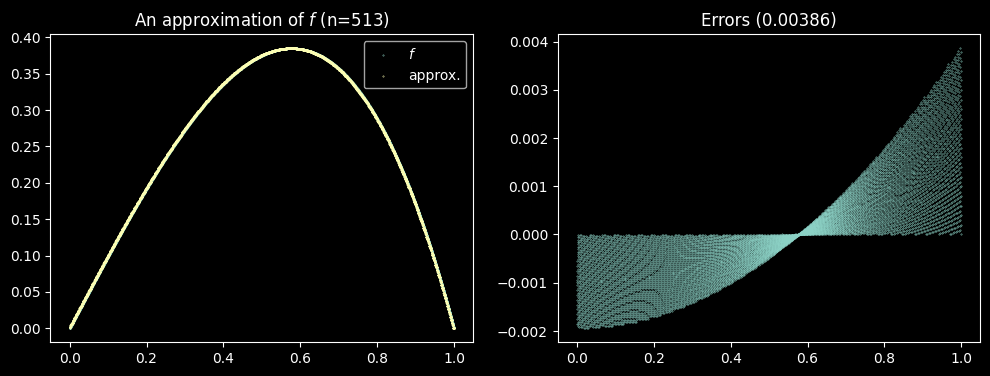

In [ ]:
f = lambda x:-1 * (x+1) * x * (x-1)

domain = np.linspace(0,1,10001)

for n in [3, 5, 9, 17 ,33, 65, 129, 257, 513]:
  d=np.linspace(0,1,n)
  a=d[:-1]
  b=d[1:]
  fn=sum([f(b)*boxcar(domain,a,b) for a,b in list(zip(a,b))])

  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.scatter(domain, f(domain), s=.1, label='$f$')
  plt.scatter(domain, fn, s=.1, label='approx.')
  plt.title(f"An approximation of $f$ (n={n})")
  plt.legend()

  plt.subplot(1,2,2)
  err = f(domain)-fn
  plt.scatter(domain, err, s=.1)
  plt.title(f"Errors ({np.abs(err).max():.5f})")

  plt.show()

* 우리는 여러 개의 단위 계단 함수를 사용하여 함수 $ f $ 를 근사함.

닫힌 구간 $ K $ 를 여러 개의 닫힌 구간들의 곱(product)으로 대체하면,  
더 일반적인 함수 $ f:\mathbb{R}^d\rightarrow\mathbb{R}^D $ 의 경우도 동일한 방식으로 보일 수 있음.


#### 단위 계단 함수의 연속 버전 (Continuous Version of Unit Step Function)


* 우리는 여러 개의 시그모이드 함수를 사용하여 함수 $ f $ 를 근사함.


* 우리는 여러 개의 ReLU(정류 선형 유닛) 함수를 사용하여 함수 $ f $ 를 근사함.


#### 요약 (Summary)

* 연속 함수 $ f:\mathbb{R}^d\rightarrow\mathbb{R}^D $
* 연속이며 다항식이 아닌 함수 $ \sigma:\mathbb{R}\rightarrow\mathbb{R} $

이때, $ f $ 는 다음과 같은 신경망 표현으로 근사될 수 있음:

$$
f \approx W_2\circ\sigma\circ W_1
$$


## 임의의 깊이(Arbitrary-depth) 경우

[Wikipedia](https://en.wikipedia.org/wiki/Universal_approximation_theorem#Arbitrary-depth_case)

(2017, Zhou Lu et al.)

$ \mathcal{X} $ 를 $ \mathbb{R}^d $ 의 콤팩트 부분집합이라고 하자.  
함수 $ \sigma:\mathbb{R}\to\mathbb{R} $ 는 임의의 비아핀(non-affine) 연속 함수이며,  
최소한 한 점에서 미분 가능하고, 그 점에서 미분값이 0이 아니라고 가정하자.  

$ \mathcal{N}_{d,D:d+D+2}^{\sigma} $ 를 다음과 같은 피드포워드 신경망 공간이라 하자:

- 입력 뉴런 $ d $ 개  
- 출력 뉴런 $ D $ 개  
- 임의 개수의 은닉층을 가질 수 있으며, 각 은닉층에 $ d+D+2 $ 개의 뉴런 존재  
- 모든 은닉 뉴런은 활성화 함수 $ \sigma $ 를 사용  
- 모든 출력 뉴런은 항등(identity) 활성화 함수를 사용  
- 입력층을 $ \phi $, 출력층을 $ \rho $ 로 정의  

이때, 임의의 $ \varepsilon>0 $ 과  
연속 함수 $ f\in C(\mathcal{X},\mathbb{R}^D) $ 가 주어지면,  
다음 조건을 만족하는 신경망 $ \hat{f} \in \mathcal{N}_{d,D:d+D+2}^{\sigma} $ 가 존재함:

$$
\sup_{x \in \mathcal{X}}\,\left\|\hat{f}(x)-f(x)\right\| < \varepsilon.
$$

즉, $ \mathcal{N} $ 는 균등 위상(uniform topology)에서  
$ C(\mathcal{X}; \mathbb{R}^D) $ 에 대해 조밀(dense)함.


### 개요 (Sketch)

연속 함수 $ \sigma:\mathbb{R} \rightarrow \mathbb{R} $ 가 주어졌을 때,  

만약 $ \sigma $ 가 최소한 한 점에서 연속 미분 가능하고,  
그 점에서 미분값이 0이 아니라면,  

$\implies$
* 모든 연속 함수 $ f:\mathbb{R}^d\rightarrow \mathbb{R}^D $ 에 대해,
* 모든 콤팩트 부분집합 $ \mathcal{X} \subset \mathbb{R}^d $ 에 대해,
* 모든 $ \epsilon > 0 $ 에 대해,

다음과 같은 신경망 $ \hat{f} $ 가 존재함:

* 입력 뉴런 $ d $ 개,
* 출력 뉴런 $ D $ 개,
* 각 은닉층에 $ d+D+2 $ 개의 뉴런을 가지는 임의 개수의 은닉층을 포함하며,  
  모든 은닉 뉴런은 활성화 함수 $ \sigma $ 를 가짐.

이때, 신경망 $ \hat{f} $ 는 다음 근사 경계를 만족함:

$$
\sup_{x\in\mathcal{X}}\|f(x)-\hat{f}(x)\|<\epsilon.
$$


# 보편 근사 정리에서 얻을 수 있는 교훈 (Some Lessons from Universal Approximation Theorem)


## PyTorch

* 메뉴 → **런타임** → **런타임 유형 변경** → **하드웨어 가속기** → **GPU**


## 실수 값 함수 (Real Valued Function)

* $ [0,1] $ 구간에서 정의된 3차 다항식(cubic polynomial).

* 주어진 데이터:

$$
\left\{\left(x_1, f(x_1)\right),\ldots, \left(x_{100}, f(x_{100})\right)\right\}.
$$


* 잘했어요! (정말로?)


## Lesson 1

인공 신경망(ANN) 모델은 콤팩트 집합 밖의 영역에 대해 예측할 수 없음.  
즉, 이 경우 $ [0,1] $ 바깥에서는 일반화되지 않음.

유의할 점: 보편 근사 정리는 다음과 같은 근사 경계를 보장할 뿐임:

$$
\sup_{x\in K}\|f(x)-f_\epsilon(x)\|<\epsilon
$$

여기서 $ K\subset\mathbb{R}^D $ 는 콤팩트 부분집합임.


## Lesson 2

충분한 데이터를 확보해야 함.

만약 3차 다항식에서 단 4개의 데이터 포인트만 사용한다면,  
좋지 않은 근사 결과를 얻게 됨.


## Lesson 3

***무엇보다 먼저***, 문제에 대한 정확한 해가 존재하는지 확인해야 함.

우리는 3차 다항식(cubic polynomial)을 다루고 있기 때문에,  
4개의 데이터 포인트만으로도 정확한 해를 찾을 수 있음.

단순히 다음 연립방정식을 풀면 됨:

$$
\begin{pmatrix}
x_1^3 & x_1^2 & x_1 & 1\\
x_2^3 & x_2^2 & x_2 & 1\\
x_3^3 & x_3^2 & x_3 & 1\\
x_4^3 & x_4^2 & x_4 & 1\\
\end{pmatrix}
\begin{pmatrix}
a\\ b\\ c\\ d\\
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\y_2 \\y_3 \\y_4 \\  
\end{pmatrix}
$$


이러한 교훈들은 데이터 과학 여정의 첫걸음일 뿐입니다.

보편 근사 정리의 명제만 읽어보아도,  
인공 신경망(ANN)의 많은 강점과 약점을 파악할 수 있습니다.

행운을 빕니다.


3일차 11월 25일
---

In [2]:
import numpy as np

def relu(x):
   return np.maximum(0, x)

# Example usage:
input_data = np.array([-1, 2, -0.5, 3])
output_data = relu(input_data)

print("Input data:", input_data)
print("Output data after applying ReLU:", output_data)

Input data: [-1.   2.  -0.5  3. ]
Output data after applying ReLU: [0. 2. 0. 3.]


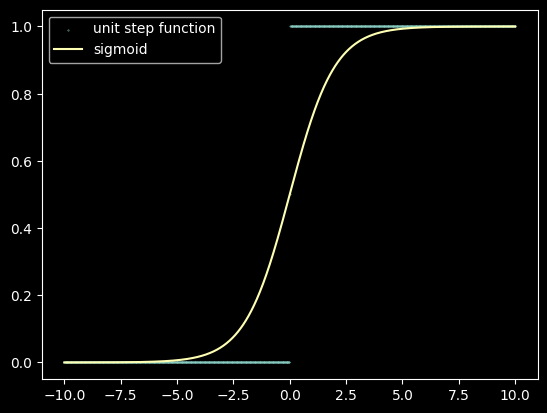

In [ ]:
sigmoid = lambda x: 1/(1+np.exp(-x))

domain = np.linspace(-10,10,1001)

plt.scatter(domain, H(domain),s=.1, label='unit step function')
plt.plot([0],[.5]) # waste one color
plt.plot(domain, sigmoid(domain), label='sigmoid')
plt.legend() #범례표시

plt.show()

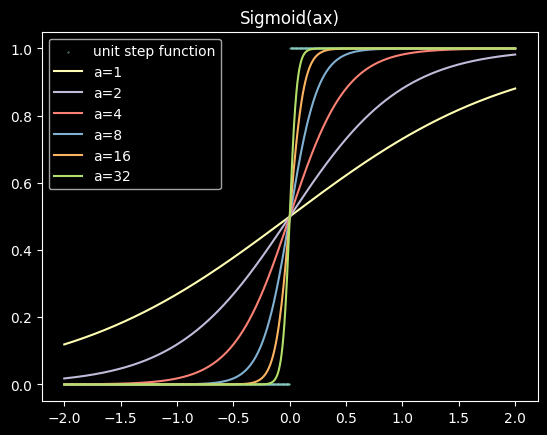

In [ ]:
domain = np.linspace(-2,2,1001)
plt.scatter(domain, H(domain), s=.1, label='unit step function')
plt.plot([0],[.5]) #waste one color
for a in [1, 2, 4 ,8, 16, 32]:
  plt.plot(domain, sigmoid(a*domain), label=f'a={a}')
plt.title("Sigmoid(ax)")
plt.legend() #범례표시
plt.show()

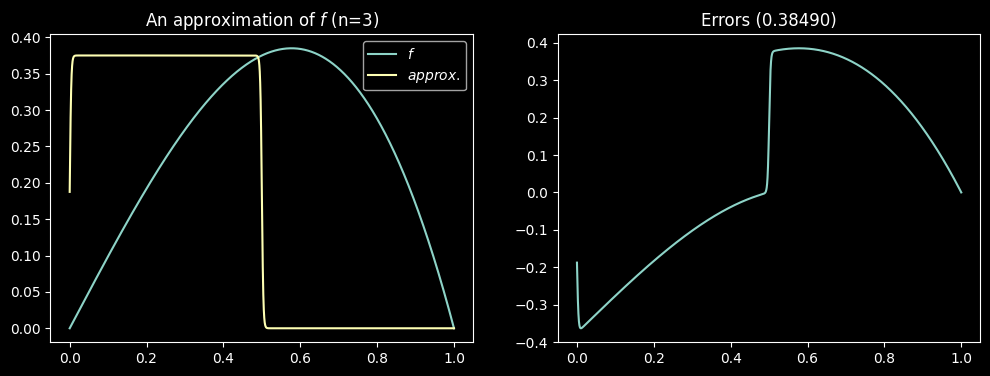

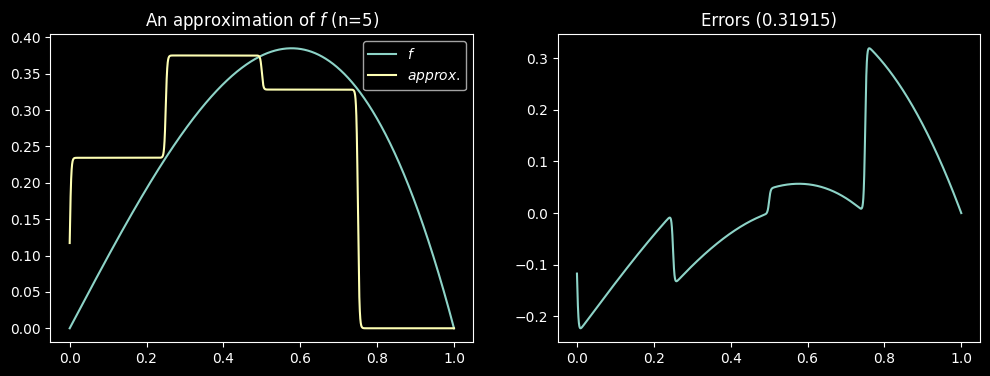

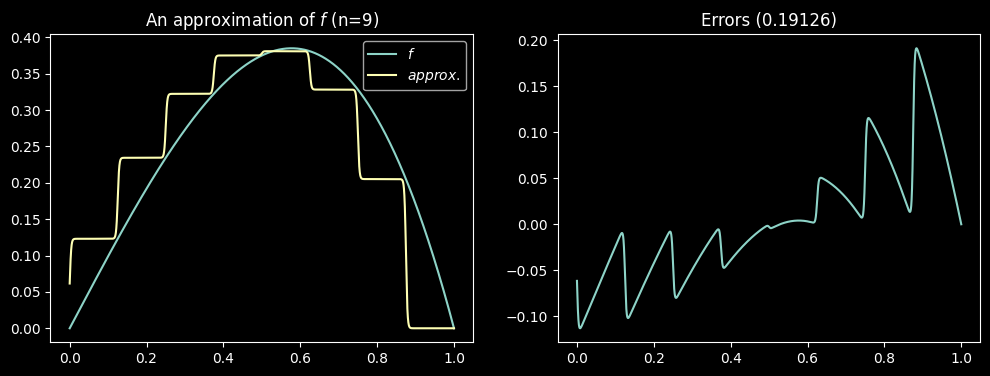

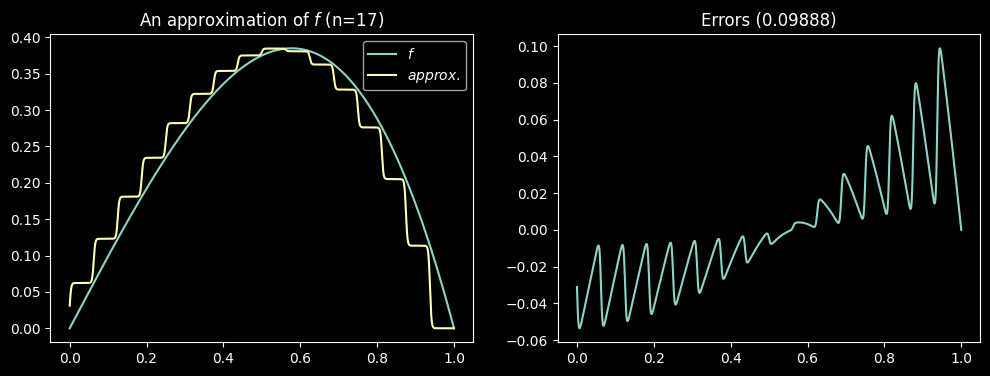

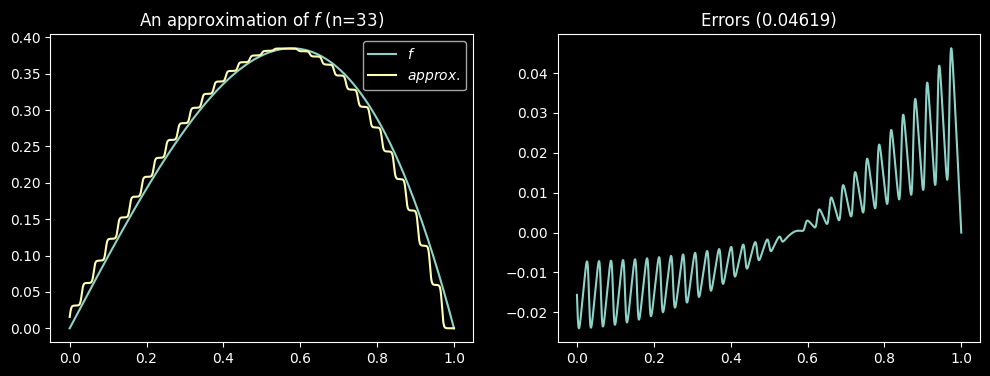

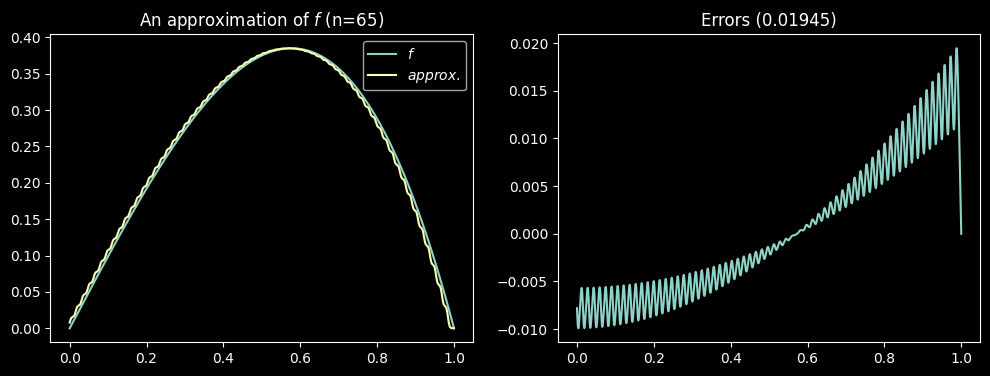

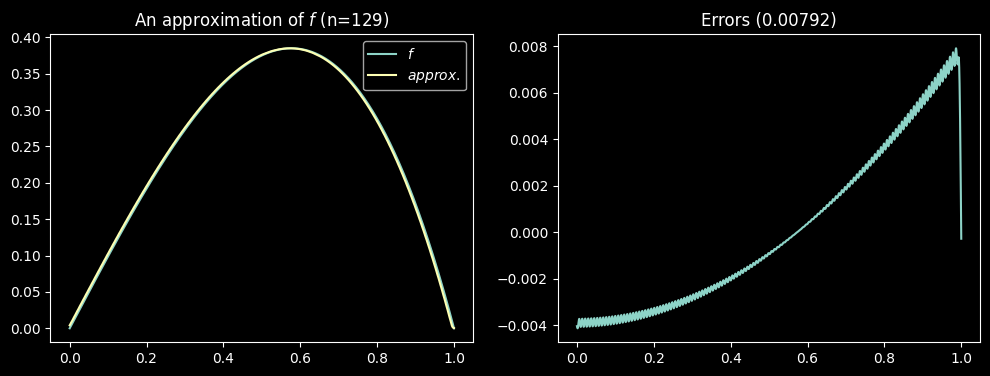

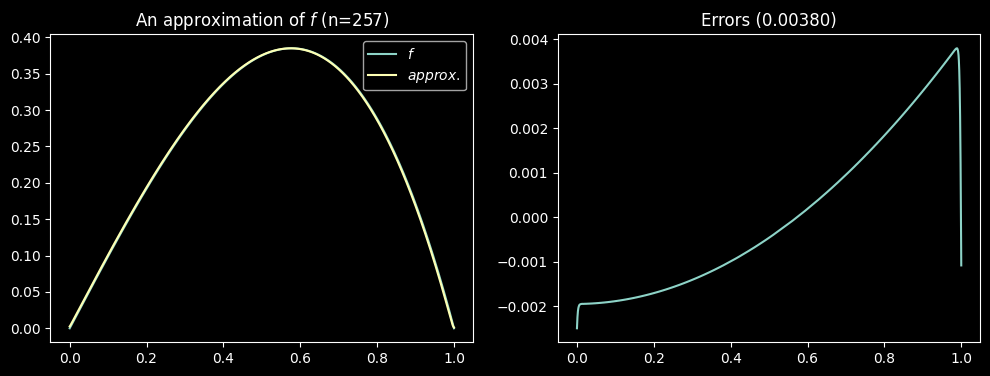

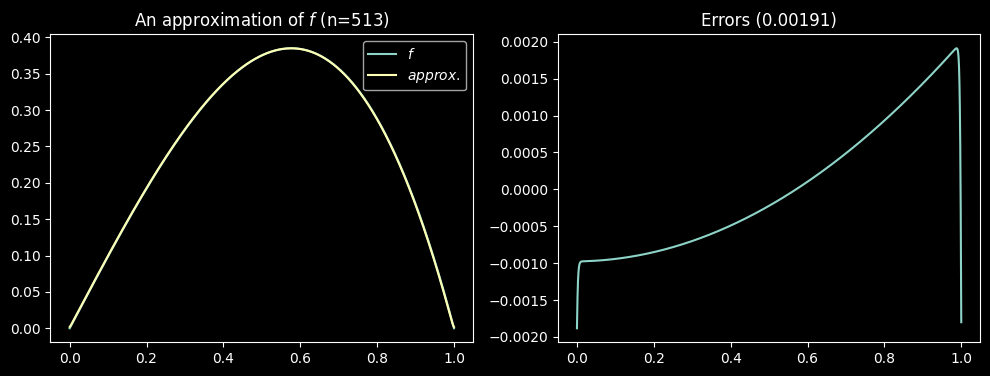

In [ ]:
f=lambda x: -1 * (x+1) * x * (x-1)

sig_boxcar = lambda x, a, b:sigmoid(512*(x-a))-sigmoid(512*(x-b))

domain = np.linspace(0,1,10001)

for n in [3,5,9,17,33,65,129,257,513]:
  d=np.linspace(0,1,n)
  a=d[:-1]
  b=d[1:]
  fn=sum([f(b)*sig_boxcar(domain,a,b) for a,b in list(zip(a,b))])

  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.plot(domain, f(domain), label='$f$')
  plt.plot(domain, fn, label='$approx.$')
  plt.title(f"An approximation of $f$ (n={n})")
  plt.legend()

  plt.subplot(1,2,2)
  err = f(domain)-fn
  plt.plot(domain, err)
  plt.title(f"Errors ({np.abs(err).max():.5f})")

  plt.show()

3일차 11월 25일
---



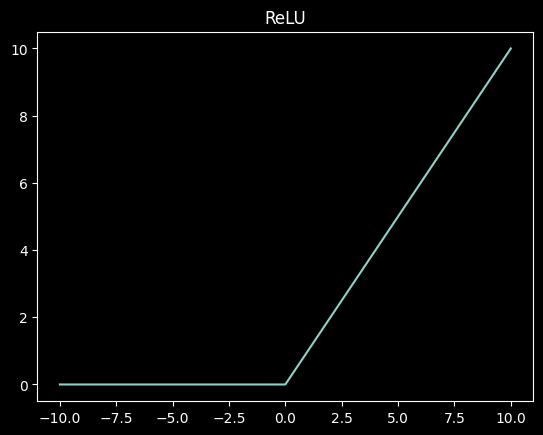

In [ ]:
relu = lambda x: x*(x>0)

domain = np.linspace(-10,10,1000)

plt.plot(domain, relu(domain))
plt.title("ReLU")
plt.show()

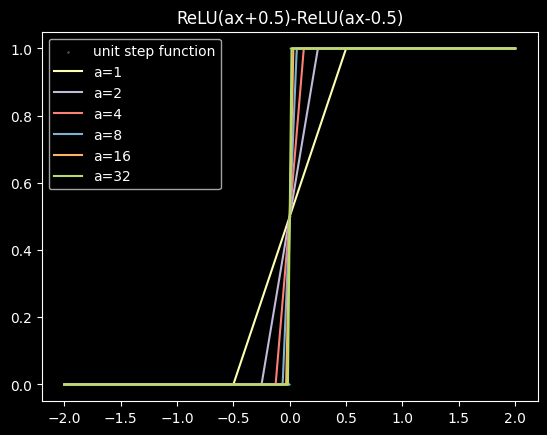

In [ ]:
domain = np.linspace(-2,2,1001)
plt.scatter(domain, H(domain), s=.1, label='unit step function')
plt.plot([0],[.5]) #waste one color
for a in [1,2,4,8,16,32]:
  plt.plot(domain, relu(a*domain+0.5)-relu(a*domain-0.5), label=f'a={a}')
plt.title("ReLU(ax+0.5)-ReLU(ax-0.5)")
plt.legend()
plt.show()

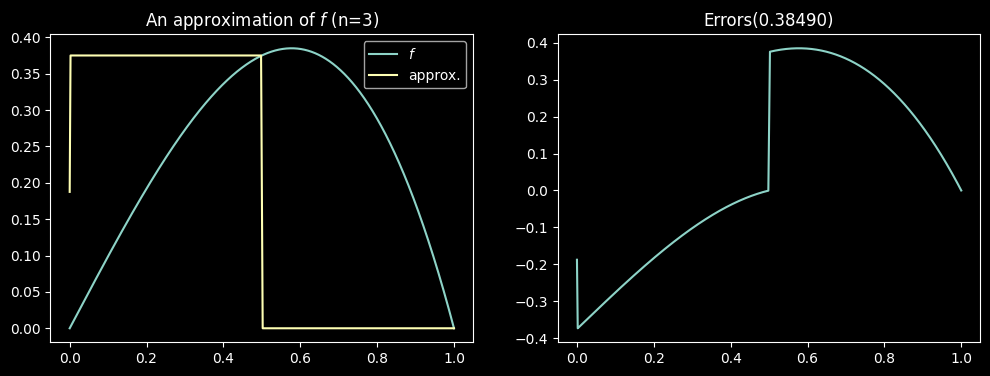

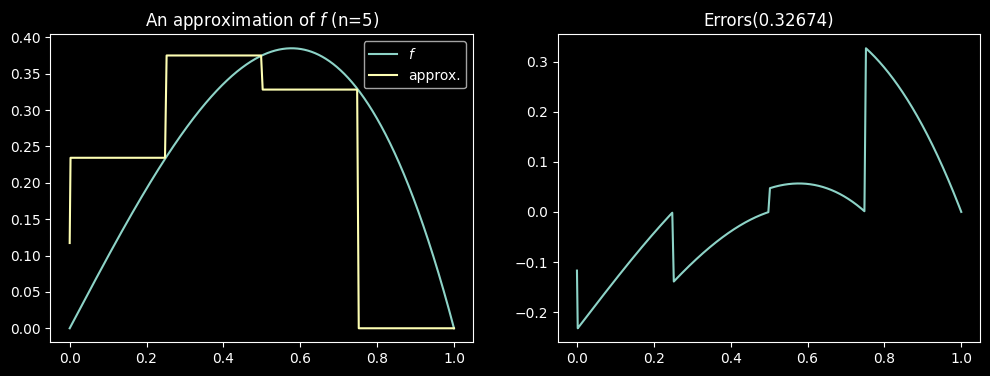

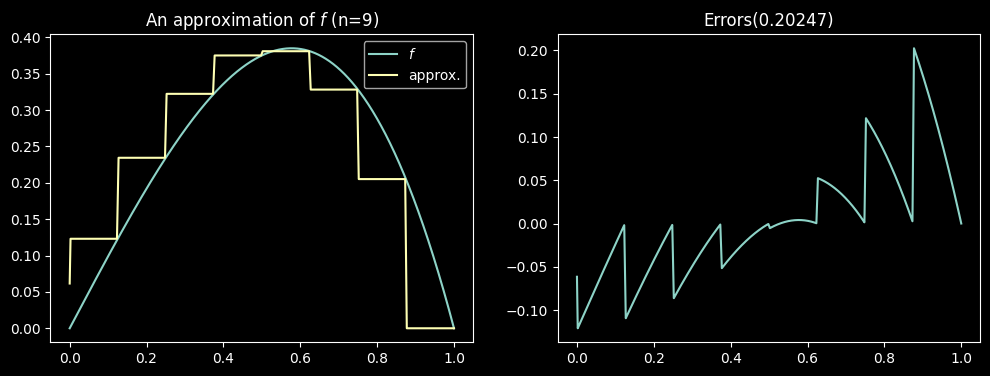

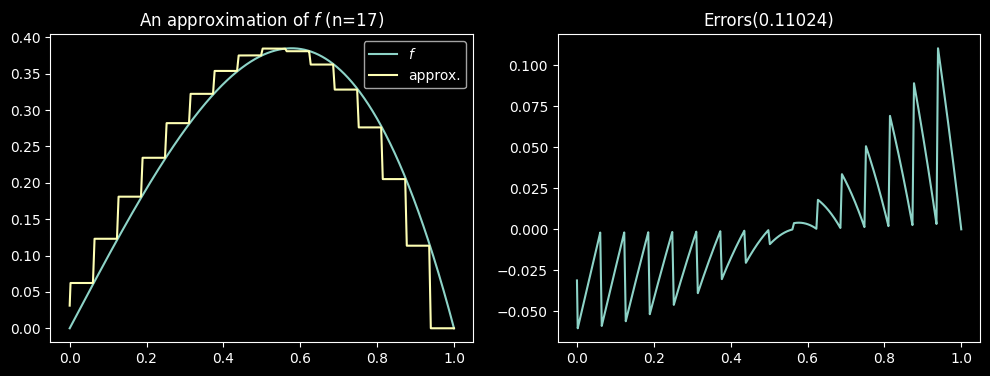

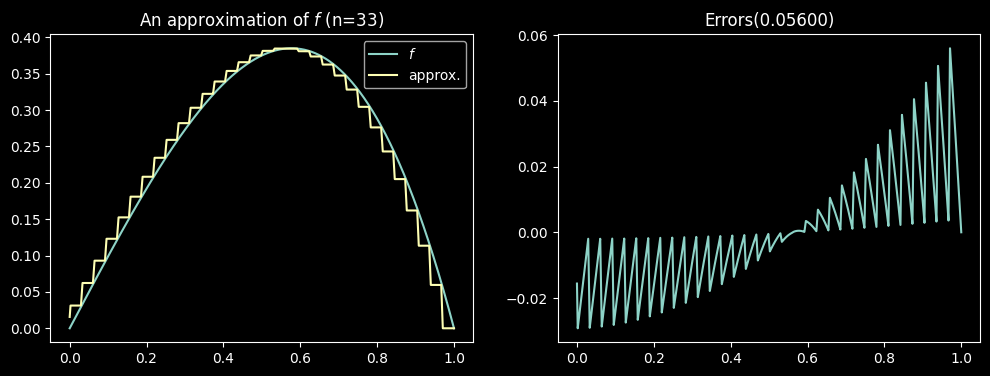

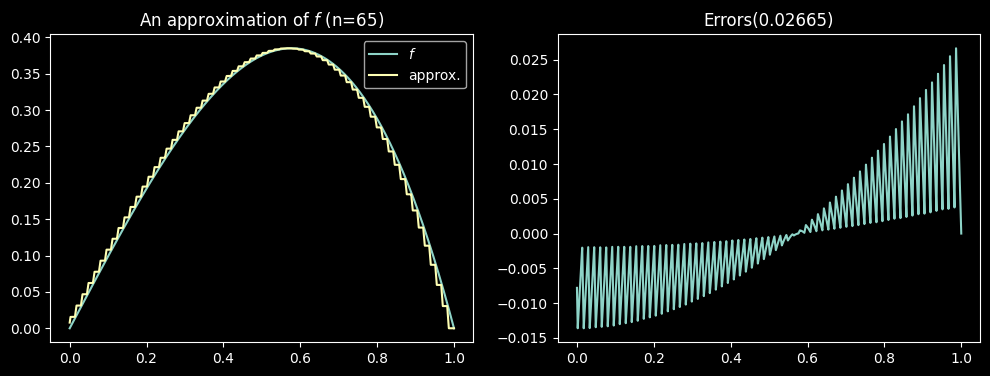

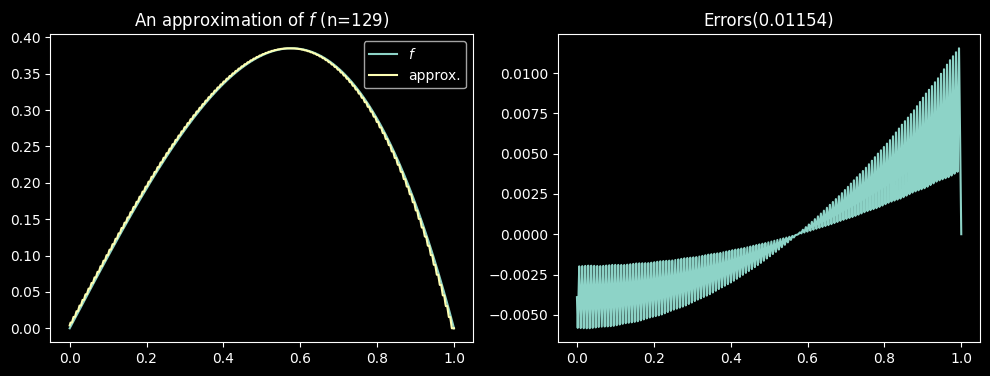

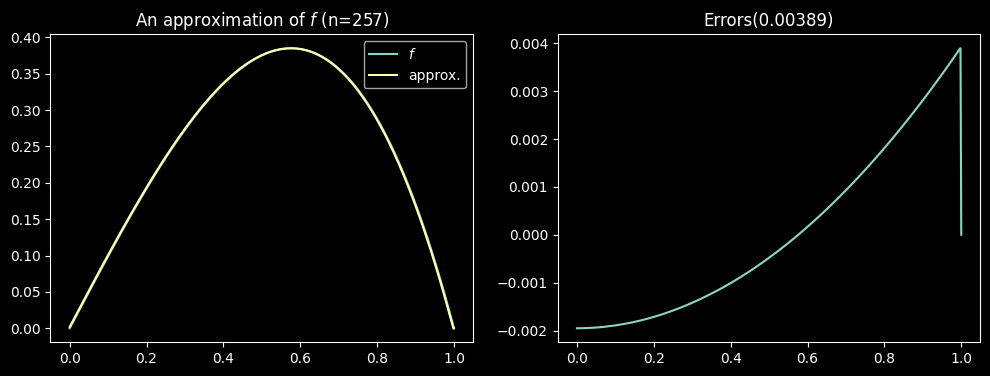

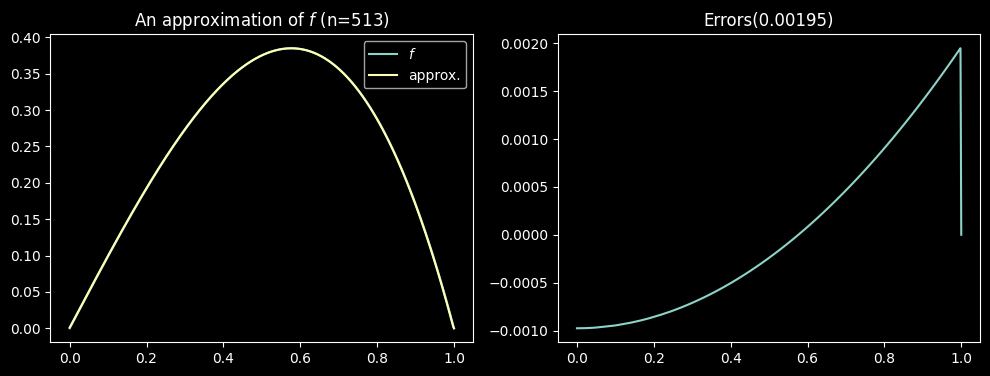

In [ ]:
f = lambda x: -1 * (x+1) * x * (x-1)

relu_boxcar = lambda x, a, b: (relu(256*(x-a)+0.5)-relu(256*(x-a)-0.5))-(relu(256*(x-b)+0.5)-relu(256*(x-b)-0.5))

domain=np.linspace(0,1,10001)

for n in [3,5,9,17,33,65,129,257,513]:
  d=np.linspace(0,1,n)
  a=d[:-1]
  b=d[1:]
  fn=sum([f(b)*relu_boxcar(domain,a,b,) for a,b in list(zip(a,b))])

  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.plot(domain,f(domain), label='$f$')
  plt.plot(domain,fn,label='approx.')
  plt.title(f"An approximation of $f$ (n={n})")
  plt.legend()

  plt.subplot(1,2,2)
  err = f(domain)-fn
  plt.plot(domain,err)
  plt.title(f"Errors({np.abs(err).max():.5f})")
  plt.show()

SimpleNN

In [ ]:
import torch
import matplotlib.pyplot as plt

class SimpleNN(torch.nn.Module):
  def __init__(self, d, w, D, activation=torch.sigmoid):  #  d는 입력층, w는 은닉층(히든레이어), D는 출력층
    super().__init__()
    self.fc1 = torch.nn.Linear(d,w)
    self.fc2 = torch.nn.Linear(w,D)
    self.activation = activation

  def forward(self,x):
    x=self.fc1(x)
    x=self.activation(x)
    x=self.fc2(x)
    return x

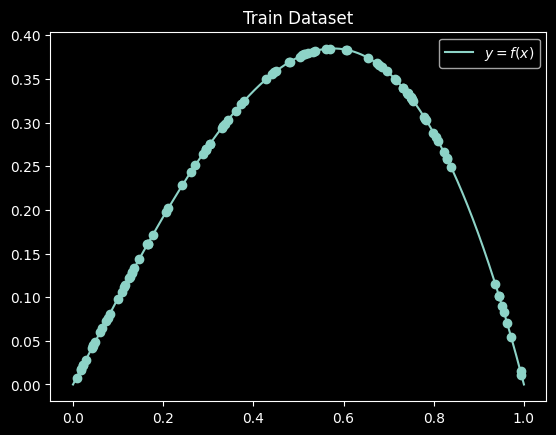

In [ ]:
plt.style.use('dark_background')

torch.manual_seed(2021)       #딥러닝 코드는 랜덤 변수를 쓰는데 seed는 고정 시키는 것이다.

f = lambda x: -x*(x-1)*(x+1)
x= torch.linspace(0,1,1000)
xx=torch.linspace(-1, 1.5, 2500)
x_tr = torch.rand(100) # 100 points in [0,1)
y_tr = f(x_tr)

plt.title('Train Dataset')
plt.plot(x,f(x),label='$y=f(x)$')
plt.scatter(x_tr,y_tr)
plt.legend()
plt.show()

In [ ]:
net = SimpleNN(1,20,1,torch.sigmoid) # 50 hidden neurons

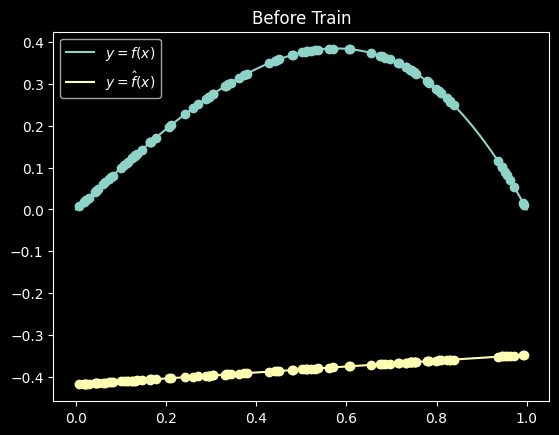

In [ ]:
plt.title('Before Train')
plt.plot(x,f(x),label='$y=f(x)$')
plt.scatter(x_tr,y_tr)

with torch.no_grad():
  plt.plot(x,net(x.unsqueeze(1)), label='$y=\hat{f}(x)$')
  plt.scatter(x_tr, net(x_tr.unsqueeze(1)))

plt.legend()
plt.show()

In [ ]:
net.cuda()

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

for t in range(1000):
  y_pred = net(x_tr.unsqueeze(1).cuda())
  loss=torch.nn.functional.mse_loss(y_pred.flatten(), y_tr.cuda())
  if t%100==99:
    print(t,loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

99 1.5224545677483547e-06
199 1.1242469781791442e-06
299 1.1237912076467182e-06
399 1.12324573819933e-06
499 1.1225970411032904e-06
599 1.1219522093597334e-06
699 1.1211573109903838e-06
799 1.1203186431885115e-06
899 1.1194185844942695e-06
999 1.1183587957930285e-06


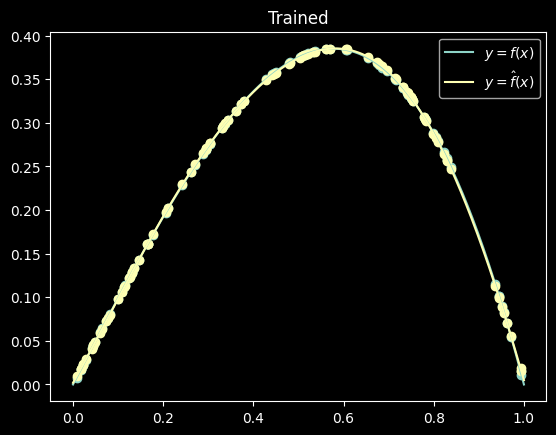

In [ ]:
net.eval()
net.cpu()

plt.title('Trained')
plt.plot(x,f(x),label='$y=f(x)$')
plt.scatter(x_tr,y_tr)

with torch.no_grad():
  plt.plot(x,net(x.unsqueeze(1)), label='$y=\hat{f}(x)$')
  plt.scatter(x_tr, net(x_tr.unsqueeze(1)))

plt.legend()
plt.show()